In [1]:
# 1. IMPORT LIBRARIES
# importing  tools needed for maths and machine learning
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 2. LOAD DATA
# We are pulling a standard spam dataset directly from a raw URL so we don't have to upload files manually.
url = "https://raw.githubusercontent.com/mohitgupta-omg/Kaggle-SMS-Spam-Collection-Dataset-/master/spam.csv"
print("Downloading dataset...")

# The dataset is often encoded in 'latin-1', so we specify that here.
df = pd.read_csv(url, encoding='latin-1')

# 3. CLEAN DATA STRUCTURE
# The dataset has some empty columns we don't need. We drop them.
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

# Rename columns to be clear: v1 is the Label (ham/spam), v2 is the Text.
df = df.rename(columns={'v1': 'label', 'v2': 'text'})

# Convert 'ham' and 'spam' to numbers (0 and 1) for the computer
df['label_num'] = df.label.map({'ham': 0, 'spam': 1})

# Show the first 5 rows to prove it loaded
print("Data Loaded Successfully!")
print(df.head())

Data Loaded Successfully!
  label                                               text  label_num
0   ham  Go until jurong point, crazy.. Available only ...          0
1   ham                      Ok lar... Joking wif u oni...          0
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...          1
3   ham  U dun say so early hor... U c already then say...          0
4   ham  Nah I don't think he goes to usf, he lives aro...          0


In [2]:
# 4. SPLIT DATA
# Were gonna split the data: 80% for training, 20% for testing.
X_train, X_test, y_train, y_test = train_test_split(
    df['text'],
    df['label_num'],
    test_size=0.2,
    random_state=42
)

print(f"Training on {len(X_train)} emails.")
print(f"Testing on {len(X_test)} emails.")

# 5. BUILD THE PIPELINE
# Step 1: Convert text to numbers
# Step 2: Multinomial Naive Bayes (The actrual AI Model)
model_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', MultinomialNB())
])

# 6. TRAIN THE MODEL
print("Training the model...")
model_pipeline.fit(X_train, y_train)
print("Model trained successfully!")

Training on 4457 emails.
Testing on 1115 emails.
Training the model...
Model trained successfully!


In [3]:
# 7. EVALUATE PERFORMANCE
predictions = model_pipeline.predict(X_test)

# Calculate simple accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy Score: {accuracy * 100:.2f}%")

# Show full the full  classification report
print("\nClassification Report:")
print(classification_report(y_test, predictions))

Accuracy Score: 96.23%

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.72      0.84       150

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115



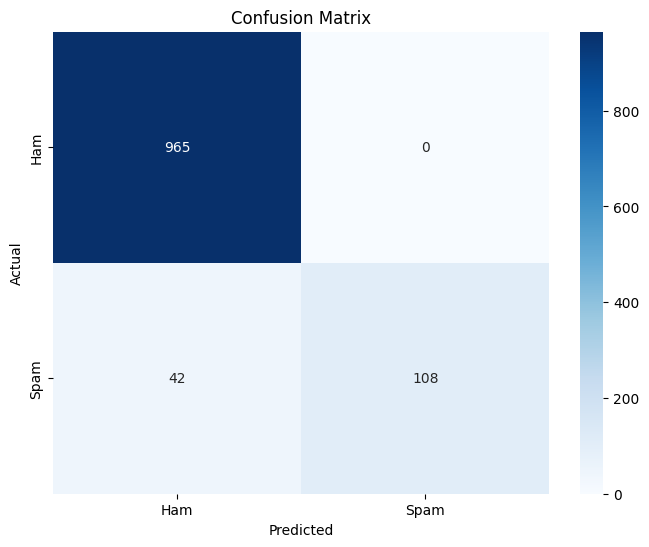

In [4]:
# 8. VISUALISE CONFUSION MATRIX
# This will hopefully create a heatmap to show false positives and false negatives
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Ham', 'Spam'],
            yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()